<a href="https://colab.research.google.com/github/VanshikaNehra23/STC_DS_Tasks/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input,Conv2D, Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0 , x_test/255.0
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28)


In [ ]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
K=len(set(y_train))
print("number of classes:",K);

number of classes: 10


In [ ]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)
model=Model(i,x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6986 - accuracy: 0.7464 - val_loss: 0.4200 - val_accuracy: 0.8456
Epoch 2/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3701 - accuracy: 0.8610 - val_loss: 0.3565 - val_accuracy: 0.8700
Epoch 3/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3123 - accuracy: 0.8821 - val_loss: 0.3359 - val_accuracy: 0.8730
Epoch 4/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2741 - accuracy: 0.8969 - val_loss: 0.3078 - val_accuracy: 0.8900
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2492 - accuracy: 0.9050 - val_loss: 0.3009 - val_accuracy: 0.8918
Epoch 6/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2225 - accuracy: 0.9149 - val_loss: 0.3001 - val_accuracy: 0.8958
Epoch 7/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2089 - accuracy: 0.9190 - val_loss: 0.2947 -

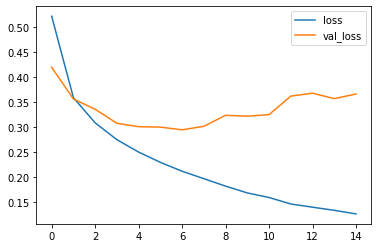

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

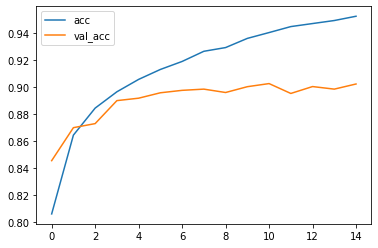

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix,without normalization
[[853   0  20  23   3   1  91   0   9   0]
 [  3 977   0  16   2   0   1   0   1   0]
 [ 19   0 853  15  47   0  65   0   1   0]
 [ 13   8  14 924  22   0  19   0   0   0]
 [  1   1  48  36 844   0  69   0   1   0]
 [  0   0   0   1   0 971   1  13   2  12]
 [111   0  60  35  82   0 698   0  14   0]
 [  0   0   0   0   0  14   0 958   0  28]
 [  1   0   4   3   3   2   4   3 979   1]
 [  1   0   0   0   0   5   0  27   1 966]]


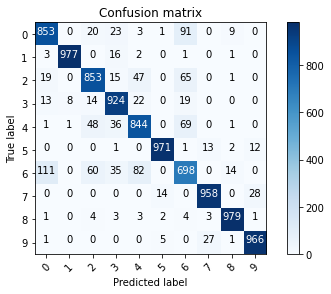

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt='.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]> thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
labels='''Tshirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

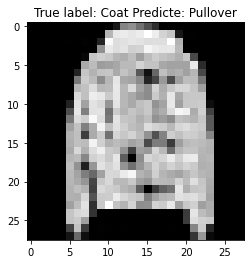

In [ ]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicte: %s"%(labels[y_test[i]],labels[p_test[i]]));